# **lab 2**

### 实验目标

1. 学习使用PYG进行数据集&数据处理
2. 利用OGB数据集进行处理
3. 利用OGB数据集来建立一个简单的GCN模型并进行验证
4. 建立图神经网络GNN，并对OGB数据集进行属性预测

### 实验说明

1. 需要大家完成的任务是加粗且带有得分的题目，如 `问题 i：XXXXXXX（15分）`
2. 做完实验后，请举手通知助教检查实验代码以及问题的输出结果，以便给同学们进行打分
3. 如果大家有疑问尽量在实验课的前60分钟提出，后30分钟主要用于检查同学们的实验结果，可能时间没那么充裕

### 参考文档：
此处给出官方文档，同样推荐同学们去别的平台如stackoverflow等搜索
1. NetworkX: https://networkx.org/documentation/stable/tutorial.html
2. PyG ：https://pytorch-geometric.readthedocs.io/en/latest/
3. OGB ：https://ogb.stanford.edu/


我们将使用PyTorch Geometric（PyG）构建我们自己的图神经网络，并将模型应用于Open Graph Benchmark（OGB）数据集中的两个。 这两个数据集用于评估模型在两种不同的图相关任务上的表现。一个是节点属性预测，预测单个节点的属性。另一个是图属性预测，预测整个图或子图的属性。

注意：确保按顺序运行每个部分中的所有单元格，这样中间变量/包就可以传递到下一个单元格。


# 设备
+ 可选项：使用GPU加速（需要自己安装CUDA和torch-GPU版本）
+ 使用CPU也可以，最长运行一个代码约5min左右

# 安装
需要的库：
1. torch-scatter
2. torch-sparse
3. torch-geometric

In [18]:
# 注意下方安装库之前首先切换到自己的虚拟环境
# !pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-geometric
# !pip install ogb
# 跑一次就行了，不用多次运行

# 1 PyG: 数据集&数据


PyTorch Geometric 通常有两个类用于将图结构存储或转换为张量格式。分别为torch_geometric.datasets与 torch_geometric.data，后者提供了将图数据处理为 PyTorch 张量的功能。


## PyG 数据集

torch_geometric.datasets 包含许多常见的图结构数据集。这里我们将通过一个示例数据集来学习它的使用方法。

In [ ]:
from torch_geometric.datasets import TUDataset

root = './enzymes'  # 数据集的存储路径
name = 'ENZYMES'    # 数据集名称

# 加载 ENZYMES 数据集
pyg_dataset = TUDataset('./enzymes', 'ENZYMES')

# 打印数据集信息，可以发现该数据集中包含 600 个图
print(pyg_dataset)


## 问题 1：ENZYMES 数据集中有多少个类别（classes）和多少个特征（features）？（20 分）

In [3]:
def get_num_classes(pyg_dataset):
  # TODO: 实现一个函数，接收一个 PyG 数据集对象，
  # 并返回该数据集的类别数量。

  num_classes = 0

  ############# 在此处编写你的代码 ############
  ## （约 1 行代码）lab2.ipynb
  
  # TODO: 获取类别数量
  num_classes = pyg_dataset.num_classes  # 获取类别数量

  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # TODO: 实现一个函数，接收一个 PyG 数据集对象，
  # 并返回该数据集中每个节点的特征数量。

  num_features = 0

  ############# 在此处编写你的代码 ############
  ## （约 1 行代码）
  # TODO：获取特征数量
  num_features = pyg_dataset.num_features  # 获取特征数量

  #########################################

  return num_features

# 你可能会发现某些信息需要存储在数据集层级，
# 特别是在数据集中包含多个图时。

num_classes = get_num_classes(pyg_dataset)
num_features = get_num_features(pyg_dataset)
print("{} 数据集包含 {} 个类别".format(name, num_classes))
print("{} 数据集包含 {} 个特征".format(name, num_features))


ENZYMES 数据集包含 6 个类别
ENZYMES 数据集包含 3 个特征


## PyG Data

每个 PyG 数据集通常存储的是一个 torch_geometric.data.Data 对象的列表。每个 Data 对象通常代表一个图。你可以通过索引数据集轻松获取某个具体的 Data 对象。


参考官方文档：[Data 对象文档。](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data)

## 问题 2：ENZYMES 数据集中索引为 100 的图的标签是什么？（20 分）

In [4]:
def get_graph_class(pyg_dataset, idx):
  # TODO: 实现这个函数，接收一个 PyG 数据集对象、
  # 图在数据集中的索引，返回该图的类别标签（整数）。

  label = -1  # 默认标签为 -1

  ############# 在此处编写你的代码 ############
  ## （约 1 行代码）
  # TODO：获取图标签
  label = pyg_dataset[idx].y.item()  # 获取图的标签，并转换为整数

  #########################################

  return label

# 这里的 pyg_dataset 是用于图分类的数据集
graph_0 = pyg_dataset[0]
print(graph_0)  # 打印第一个图的信息

idx = 100
label = get_graph_class(pyg_dataset, idx)
print('索引为 {} 的图的标签为 {}'.format(idx, label))


Data(edge_index=[2, 168], x=[37, 3], y=[1])
索引为 100 的图的标签为 4


## 问题 3：ENZYMES 数据集中索引为 200 的图有多少条边？（20 分）

在 PyG 中，图的边信息存储在 edge_index 中，它的形状是 [2, num_edges]。其中的每一列表示一条边的起点和终点。

由于这是一个无向图，每条边通常会存储两次（即一次从 A→B，一次从 B→A），因此需要除以 2 得到真实的边数

In [5]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: 实现该函数，接收一个 PyG 数据集对象和图的索引，
  # 返回该图中的边数（整数）。如果图是无向图，同一条边不能重复计数。
  # 例如，在一个无向图 G 中，若节点 v 与 u 相连，该边只能计一次。

  num_edges = 0  # 初始化边数为 0

  ############# 在此处编写你的代码 ############
  ## 注意：
  ## 1. 不能直接返回 data.num_edges
  ## 2. 假设图是无向的
  ## （约 3-4 行代码）
  
  # TODO：获取实际边数
  num_edges = pyg_dataset[idx].num_edges  # 获取边的总数（可能包含重复）
  if pyg_dataset[idx].is_undirected:      # 如果是无向图
      num_edges //= 2                     # 除以 2 得到实际边数

  #########################################

  return num_edges

# 获取索引为 200 的图的边数
idx = 200
num_edges = get_graph_num_edges(pyg_dataset, idx)
print('索引为 {} 的图有 {} 条边'.format(idx, num_edges))


索引为 200 的图有 53 条边


# 2 Open Graph Benchmark (OGB)

Open Graph Benchmark (OGB) 是一个用于图机器学习的现实、大规模且多样化的基准数据集集合。OGB 的数据集可以通过 OGB 数据加载器自动下载、处理和拆分。模型性能还可以通过 OGB 评估器以统一的方式进行评估。

## 数据集和数据

OGB 还支持 PyG 数据集和数据。这里我们将关注 ogbn-arxiv 数据集。

In [6]:
# 这里如果使用PYG2.6可能出现问题，需要手动指定DataTensorAttr，GlobalStorage安全性
import torch
from torch_geometric.data.data import DataTensorAttr
from torch_geometric.data.storage import GlobalStorage
from torch_geometric.data.data import DataEdgeAttr
# 只添加错误消息中提到的类
torch.serialization.add_safe_globals([
    DataTensorAttr,
    GlobalStorage
])
torch.serialization.add_safe_globals([DataEdgeAttr])

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name, transform=T.ToSparseTensor())
print('数据集 {} 包含 {} 个图'.format(dataset_name, len(dataset)))
data = dataset[0]
print(data)

数据集 ogbn-arxiv 包含 1 个图
Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


## 问题 4：ogbn-arxiv 图中的特征数量是多少？（20 分）

In [7]:
def graph_num_features(data):
  # TODO: 实现此函数，接收一个 PyG 数据对象，
  # 返回图中的特征数量（以整数表示）。

  num_features = 0  # 初始化特征数量

  ############# 在此处编写你的代码 ############
  ## （约 1 行代码）
  num_features = data.x.size(1)  # 获取节点特征的数量，即每个节点的特征维度

  #########################################

  return num_features

# 获取 ogbn-arxiv 图的特征数量
num_features = graph_num_features(data)
print('该图包含 {} 个特征'.format(num_features))


该图包含 128 个特征


# 3 GNN：节点属性预测


在本节中，我们将使用 PyTorch Geometric 构建第一个图神经网络，并应用于节点属性预测（节点分类）。

这里使用 GCN 运算符（[Kipf 等人 (2017)](https://arxiv.org/pdf/1609.02907.pdf)）来构建图神经网络。

你应该直接使用 PyG 内置的 GCNConv 层。

## 设置

In [8]:
import torch
import torch.nn.functional as F
print(torch.__version__)  # 打印 PyTorch 的版本号

# 使用 PyG 内置的 GCNConv 层
from torch_geometric.nn import GCNConv

# 导入 PyG 的转换模块
import torch_geometric.transforms as T

# 导入 OGB 数据集和评估器
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator


2.6.0+cpu


## 加载和预处理数据集

In [9]:
dataset_name = 'ogbn-arxiv'  # 数据集名称
# dataset = PygNodePropPredDataset(name=dataset_name,  # 创建PygNodePropPredDataset对象
                                    # transform=T.ToSparseTensor())  # 将数据转换为稀疏张量
                                    
# 使用 T.Compose 组合多个变换
dataset = PygNodePropPredDataset(name=dataset_name, 
                                 transform=T.Compose([
                                     T.ToUndirected(),  # 转换为无向图（对称图）
                                     T.ToSparseTensor()  # 转换为稀疏张量
                                 ]))
data = dataset[0]  # 获取数据集中的第一个数据

# data.adj_t = data.adj_t.to_symmetric()  # 转换为对称矩阵
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # 判断是否有GPU，如果有则使用GPU

# 如果使用GPU，设备应为cuda
print('Device: {}'.format(device))  # 输出当前设备类型

data = data.to(device)  # 将数据移动到指定的设备
split_idx = dataset.get_idx_split()  # 获取数据集的索引划分
train_idx = split_idx['train'].to(device)  # 将训练集索引移动到指定设备


Device: cpu


## GCN模型

根据下图来实现GCN模型


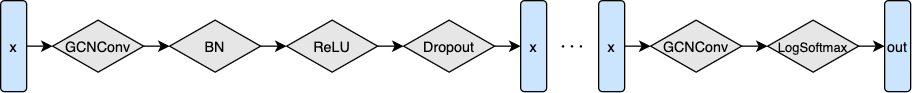

In [10]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # 初始化函数，创建模型的各个层

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None  # 用来存储GCN卷积层

        # A list of 1D batch normalization layers
        self.bns = None  # 用来存储BatchNorm1d层

        # The log softmax layer
        self.softmax = None  # 用来存储LogSoftmax层

        ############# Your code here ############
        ## 注意：
        ## 1. self.convs 和 self.bns 应该使用 torch.nn.ModuleList 来实现
        ## 2. self.convs 应包含 num_layers 个 GCNConv 层
        ## 3. self.bns 应包含 num_layers - 1 个 BatchNorm1d 层
        ## 4. self.softmax 使用 torch.nn.LogSoftmax
        ## 5. GCNConv 的参数包括 'in_channels' 和 'out_channels'。更多信息请参考文档：
        ##    https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. BatchNorm1d 的唯一参数是 'num_features'。更多信息请参考文档：
        ##    https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10行代码)

        def get_in_channels(idx):
            return hidden_dim if idx > 0 else input_dim  # 获取每一层的输入通道数

        def get_out_channels(idx):
            return hidden_dim if idx < num_layers - 1 else output_dim  # 获取每一层的输出通道数

        # 创建 GCNConv 和 BatchNorm1d 层
        self.convs = torch.nn.ModuleList([
            GCNConv(in_channels=get_in_channels(i), out_channels=get_out_channels(i))
            for i in range(num_layers)
        ])

        self.bns = torch.nn.ModuleList([
            torch.nn.BatchNorm1d(num_features=get_out_channels(i))
            for i in range(num_layers - 1)
        ])

        self.softmax = torch.nn.LogSoftmax(dim=1)  # 使用LogSoftmax作为输出层

        #########################################

        # dropout 的概率
        self.dropout = dropout

        # 是否返回节点嵌入
        self.return_embeds = return_embeds

    def reset_parameters(self):
        # 重置每个卷积层和批归一化层的参数
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # 前向传播函数，接收特征张量x和邻接矩阵adj_t并返回输出

        out = None

        ############# Your code here ############
        ## 注意：
        ## 1. 按照图中的结构构建网络
        ## 2. 使用 torch.nn.functional.relu 和 torch.nn.functional.dropout
        ##    这两个函数非常有用。更多信息请参考文档：
        ##    https://pytorch.org/docs/stable/nn.functional.html
        ## 3. 不要忘记将 F.dropout 设置为训练模式
        ## 4. 如果 return_embeds 为 True，则跳过最后的 softmax 层
        ## (~7行代码)

        # 前 num_layers-1 层使用卷积、批归一化、激活函数和dropout
        for gcn, bn in zip(self.convs[:-1], self.bns):
            x = gcn(x, adj_t)  # GCNConv 层
            x = bn(x)  # 批归一化层
            x = F.relu(x)  # 激活函数
            x = F.dropout(x, p=self.dropout, training=self.training)  # dropout 层

        # 最后一层只使用卷积层
        out = self.convs[-1](x, adj_t)
        if not self.return_embeds:
            out = self.softmax(out)  # 使用 softmax 层

        #########################################

        return out  # 返回最终的输出


In [11]:
def train(model, data, train_idx, optimizer, loss_fn):
    model.train()
    loss = 0

    optimizer.zero_grad()

    out = model(data.x, data.adj_t)

    train_pred = out[train_idx]
    train_y = data.y[train_idx].squeeze()

    loss = loss_fn(train_pred, train_y)

    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [12]:
# 测试函数
@torch.no_grad()
def test(model, data, split_idx, evaluator):
    # TODO: 实现这个函数，使用给定的split_idx和evaluator来测试模型
    model.eval()

    # 模型在所有数据上的输出
    out = None

    ############# 你的代码在这里 ############
    ## (~1行代码)
    ## 注意:
    ## 1. 这里不要使用索引切片

    out = model(data.x, data.adj_t)

    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    return train_acc, valid_acc, test_acc

In [13]:
# 训练相关参数，epochs可以适度增加保证模型效率（但是会训练起来很慢！）
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
args

{'device': 'cpu',
 'num_layers': 3,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.01,
 'epochs': 100}

In [14]:
model = GCN(data.num_features, args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [15]:
import copy

# 重置参数来初始化随机值
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  loss = train(model, data, train_idx, optimizer, loss_fn)
  result = test(model, data, split_idx, evaluator)
  train_acc, valid_acc, test_acc = result
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

C:\Users\15914\.conda\envs\conda3.12\Lib\site-packages\torch_sparse\tensor.py:574: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse_csr_tensor(rowptr, col, value, self.sizes())


Epoch: 01, Loss: 4.0403, Train: 21.79%, Valid: 26.91% Test: 24.22%
Epoch: 02, Loss: 2.3475, Train: 27.78%, Valid: 24.59% Test: 29.87%
Epoch: 03, Loss: 1.9244, Train: 33.62%, Valid: 27.45% Test: 31.71%
Epoch: 04, Loss: 1.7309, Train: 41.38%, Valid: 37.97% Test: 39.23%
Epoch: 05, Loss: 1.6381, Train: 44.50%, Valid: 41.16% Test: 39.29%
Epoch: 06, Loss: 1.5565, Train: 45.11%, Valid: 43.20% Test: 42.81%
Epoch: 07, Loss: 1.4912, Train: 44.62%, Valid: 43.04% Test: 45.95%
Epoch: 08, Loss: 1.4439, Train: 43.64%, Valid: 42.82% Test: 46.75%
Epoch: 09, Loss: 1.4054, Train: 40.81%, Valid: 40.74% Test: 45.16%
Epoch: 10, Loss: 1.3716, Train: 38.00%, Valid: 38.13% Test: 42.88%
Epoch: 11, Loss: 1.3400, Train: 37.85%, Valid: 38.52% Test: 43.19%
Epoch: 12, Loss: 1.3221, Train: 39.30%, Valid: 40.41% Test: 44.87%
Epoch: 13, Loss: 1.2891, Train: 42.34%, Valid: 44.35% Test: 48.07%
Epoch: 14, Loss: 1.2725, Train: 45.65%, Valid: 47.96% Test: 51.15%
Epoch: 15, Loss: 1.2511, Train: 48.25%, Valid: 50.49% Test: 53

In [16]:
best_result = test(best_model, data, split_idx, evaluator)
train_acc, valid_acc, test_acc = best_result
print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Best model: Train: 73.52%, Valid: 71.81% Test: 71.28%


## 问题 5：你模型的验证集（validation）和测试集（test）上的最佳准确率是多少？ 请举手示意由助教检查. (20 points)